# __E-Mail Spam Classifier__ 📧🕵🏻‍♂️
#### __Kaggle Dataset__ - `https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset`
#### _Github Repository Link_ - `www.github.com/abhiiiman`
#### __Author__ : `Abhijit Mandal`

- Importing the required libraries here.

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")


- Reading the `Dataset` here.

In [2]:
df = pd.read_csv(r"Data\spam.csv", encoding = 'latin1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


- Getting the data shape here.

In [3]:
df.shape

(5572, 5)

- 1. Performing Data Cleaning here.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

#### Inference
- we can see here that columns unnamed - `2,3,4` are having nearly `90%` of the null values.
- We should drop them.

In [6]:
df = df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

In [7]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [9]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

#### Inference
- We are good to go now.
- Removed the null values and update the dataframe.

Formatting the dataframe here.
- Renaming the Columns
- Changed the index for better view.

In [10]:
df = df.rename(columns = {'v1' : 'Output', 'v2' : 'Input-Text'})

In [11]:
df

,Output,Input-Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [12]:
df = df.reindex(columns = ['Input-Text', 'Output'])

In [13]:
df

,Input-Text,Output
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,spam
5568,Will Ì_ b going to esplanade fr home?,ham
5569,"Pity, * was in mood for that. So...any other s...",ham
5570,The guy did some bitching but I acted like i'd...,ham


Performing the Label Encoding here.
- Converting/Encoding the Output/Target column into labels.

In [14]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [15]:
df['Output'] = encoder.fit_transform(df['Output'])

In [16]:
df.head()

,Input-Text,Output
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


- Checking for the duplicate values here.

In [17]:
df.duplicated().sum()

403

- Removing the duplicates here.

In [18]:
df = df.drop_duplicates(keep = 'first')

In [19]:
df.duplicated().sum()

0

- 2. Performing E.D.A.

- Checking value count of `spam` and `ham`
- `0` for `ham`
- `1` for `spam`

In [20]:
df['Output'].value_counts()

Output
0    4516
1     653
Name: count, dtype: int64

- Plotting bar graph here.

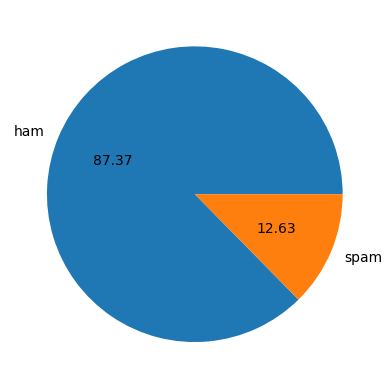

In [21]:
import matplotlib.pyplot as plt
plt.pie(df['Output'].value_counts(), labels = ['ham', 'spam'], autopct = "%0.2f")
plt.show()

In [22]:
import plotly.express as px

# Counting the values
output_counts = df['Output'].value_counts()

# Mapping the encoded values to labels
label_mapping = {0: 'Ham', 1: 'Spam'}
output_counts.index = output_counts.index.map(label_mapping)

# Creating the pie chart
fig = px.pie(values=output_counts, 
             names=output_counts.index, 
             labels={'index': 'Category'}, 
             title='Target Output Distribution')  # Remove the hole for a full pie chart

# Updating the pie chart to show percentage
fig.update_traces(textinfo='percent+label', textposition='inside')

# Showing the plot
fig.show()

Inference
- Data is imbalanced as `88%` is `Ham` and only `12%` is `spam`

- Text Processing using `NLTK`

In [23]:
import nltk

In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Abhijit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

- Getting the length of each Text here.

In [25]:
df["char_nums"] = df['Input-Text'].apply(len)
df.head()

,Input-Text,Output,char_nums
0,"Go until jurong point, crazy.. Available only ...",0,111
1,Ok lar... Joking wif u oni...,0,29
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,U dun say so early hor... U c already then say...,0,49
4,"Nah I don't think he goes to usf, he lives aro...",0,61


- Tokenizing the words here

In [26]:
df['Input-Text'].apply(lambda x : nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: Input-Text, Length: 5169, dtype: object

- Getting the word count here.

In [27]:
df['word_nums'] = df['Input-Text'].apply(lambda x : len(nltk.word_tokenize(x)))
df

,Input-Text,Output,char_nums,word_nums
0,"Go until jurong point, crazy.. Available only ...",0,111,24
1,Ok lar... Joking wif u oni...,0,29,8
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37
3,U dun say so early hor... U c already then say...,0,49,13
4,"Nah I don't think he goes to usf, he lives aro...",0,61,15
...,...,...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1,161,35
5568,Will Ì_ b going to esplanade fr home?,0,37,9
5569,"Pity, * was in mood for that. So...any other s...",0,57,15
5570,The guy did some bitching but I acted like i'd...,0,125,27


- Getting the sentence count here.

In [28]:
df['sent_nums'] = df['Input-Text'].apply(lambda x : len(nltk.sent_tokenize(x)))
df

,Input-Text,Output,char_nums,word_nums,sent_nums
0,"Go until jurong point, crazy.. Available only ...",0,111,24,2
1,Ok lar... Joking wif u oni...,0,29,8,2
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2
3,U dun say so early hor... U c already then say...,0,49,13,1
4,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1
...,...,...,...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1,161,35,4
5568,Will Ì_ b going to esplanade fr home?,0,37,9,1
5569,"Pity, * was in mood for that. So...any other s...",0,57,15,2
5570,The guy did some bitching but I acted like i'd...,0,125,27,1


- Rearranging the indices here.

In [29]:
df = df.reindex(columns = ['Input-Text', 'char_nums', 'word_nums', 'sent_nums', 'Output'])
df

,Input-Text,char_nums,word_nums,sent_nums,Output
0,"Go until jurong point, crazy.. Available only ...",111,24,2,0
1,Ok lar... Joking wif u oni...,29,8,2,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,1
3,U dun say so early hor... U c already then say...,49,13,1,0
4,"Nah I don't think he goes to usf, he lives aro...",61,15,1,0
...,...,...,...,...,...
5567,This is the 2nd time we have tried 2 contact u...,161,35,4,1
5568,Will Ì_ b going to esplanade fr home?,37,9,1,0
5569,"Pity, * was in mood for that. So...any other s...",57,15,2,0
5570,The guy did some bitching but I acted like i'd...,125,27,1,0


In [30]:
num_values = ['char_nums', 'word_nums', 'sent_nums']
df[num_values].describe()

,char_nums,word_nums,sent_nums
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


- Performing same above describe on `Ham` values now

In [31]:
df[df['Output'] == 0][num_values].describe()

,char_nums,word_nums,sent_nums
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


- Similarly for `Spam` values here.

In [32]:
df[df['Output'] == 1][num_values].describe()

,char_nums,word_nums,sent_nums
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


- Visualizations

In [33]:
import seaborn as sns

- Histplot for `Ham` count w.r.t. char count

<Axes: xlabel='char_nums', ylabel='Count'>

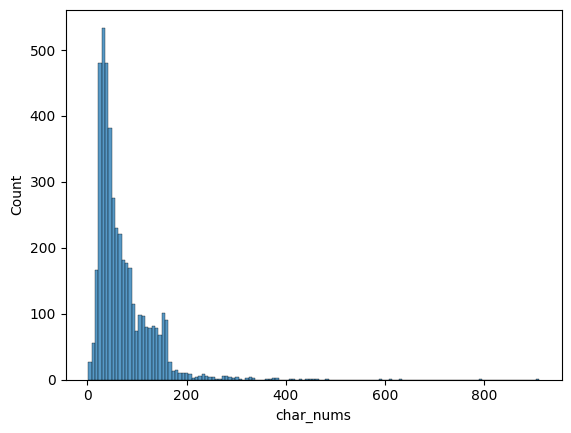

In [34]:
sns.histplot(df[df['Output'] == 0][num_values[0]])

- Histplot for `Spam` similarly.

<Axes: xlabel='char_nums', ylabel='Count'>

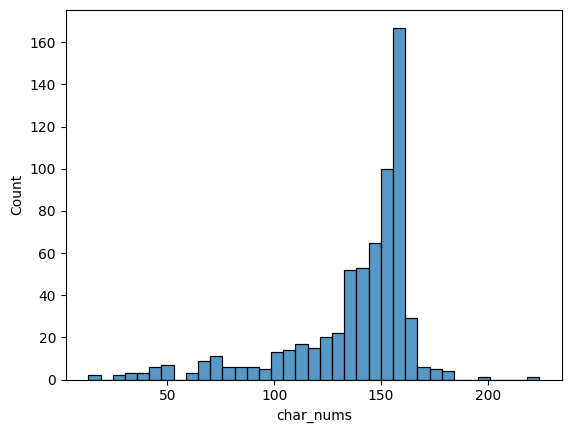

In [35]:
sns.histplot(df[df['Output'] == 1][num_values[0]])

- Plotting them together here.

<Axes: xlabel='char_nums', ylabel='Count'>

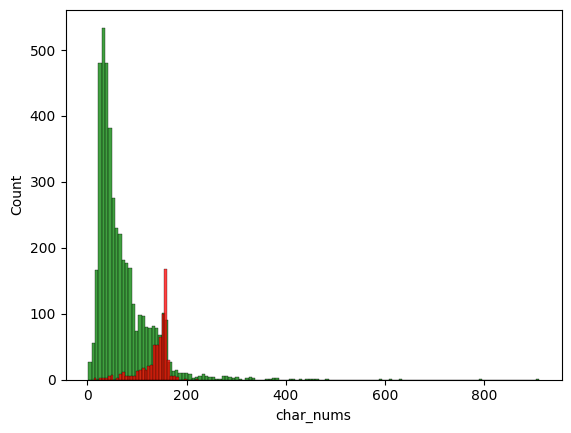

In [36]:
sns.histplot(df[df['Output'] == 0][num_values[0]], color='green')
sns.histplot(df[df['Output'] == 1][num_values[0]], color='red')

- Similarly performing for rest of the features here.
- Plotting histplot for word count

<Axes: xlabel='word_nums', ylabel='Count'>

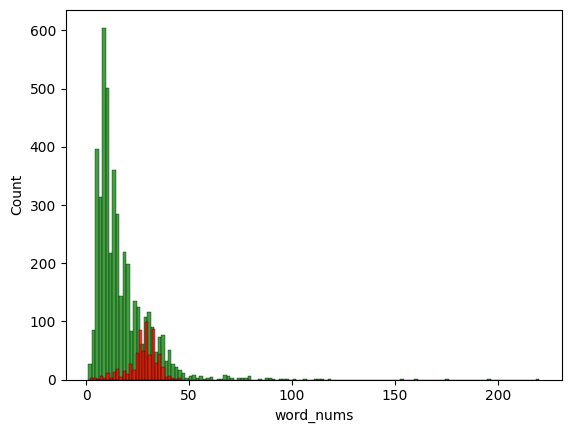

In [37]:
sns.histplot(df[df['Output'] == 0][num_values[1]], color='green')
sns.histplot(df[df['Output'] == 1][num_values[1]], color='red')

- Plotting the pairplot for the features here.

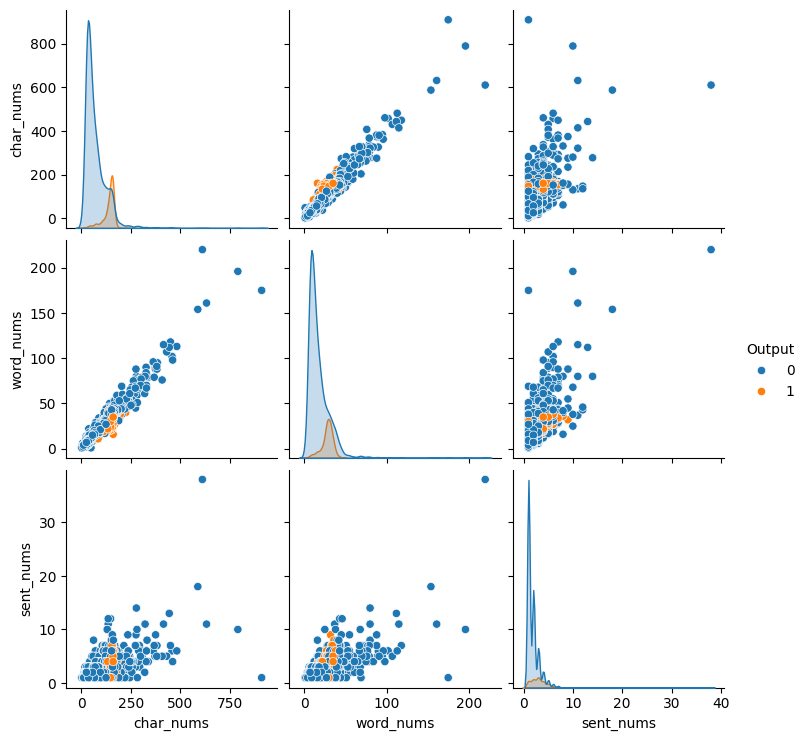

In [38]:
sns.pairplot(df, hue = 'Output')

- Checking for the correlation here.

In [39]:
df.corr(numeric_only=True)

,char_nums,word_nums,sent_nums,Output
char_nums,1.000000,0.965760,0.624139,0.384717
word_nums,0.965760,1.000000,0.679971,0.262912
sent_nums,0.624139,0.679971,1.000000,0.263939
Output,0.384717,0.262912,0.263939,1.000000


<Axes: >

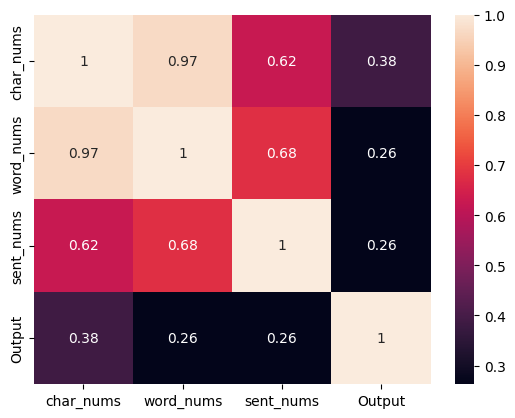

In [40]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

Inference
- As we can see there is a very strong multiple correlation.
- As only `char_nums` is contributing the most to the `Output` so we will take that only, for future model creation.

#### 3. Data Preprocessing (Text Preprocessing)
- Lower Case
- Tokenization
- Removing Special Characters
- Removing Stop Words and Punctuation
- Stemming / Lemmatization

In [41]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

In [42]:
my_stopwords = stopwords.words('english')

In [43]:
my_punc = string.punctuation

In [44]:
def transform_text(text):
    # lower case
    text = text.lower()
    # tokenization
    text = nltk.word_tokenize(text)
    # removing special characters and stop words
    final_words = []
    for word in text:
        if word not in my_punc and word not in my_stopwords:
            final_words.append(word)
    # stemming
    ps = PorterStemmer()
    final_words = [ps.stem(word) for word in final_words]
    return " ".join(final_words)

In [45]:
test_text = "Hello! i am abhijit and i am learning NLP and creating this SMS Spam detection Project."
answer = transform_text(test_text)
print(answer)

hello abhijit learn nlp creat sm spam detect project


- Applying the helper function to the dataset.

In [46]:
df['Input-Text'].apply(transform_text).head()

0    go jurong point crazi .. avail bugi n great wo...
1                        ok lar ... joke wif u oni ...
2    free entri 2 wkli comp win fa cup final tkt 21...
3          u dun say earli hor ... u c alreadi say ...
4             nah n't think goe usf live around though
Name: Input-Text, dtype: object

In [47]:
df['Transformed-Text'] = df['Input-Text'].apply(transform_text)
df.head()

,Input-Text,char_nums,word_nums,sent_nums,Output,Transformed-Text
0,"Go until jurong point, crazy.. Available only ...",111,24,2,0,go jurong point crazi .. avail bugi n great wo...
1,Ok lar... Joking wif u oni...,29,8,2,0,ok lar ... joke wif u oni ...
2,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,1,free entri 2 wkli comp win fa cup final tkt 21...
3,U dun say so early hor... U c already then say...,49,13,1,0,u dun say earli hor ... u c alreadi say ...
4,"Nah I don't think he goes to usf, he lives aro...",61,15,1,0,nah n't think goe usf live around though


- Generating the Word Cloud here

1. `Spam` wordcloud

In [48]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [49]:
spam_wc = wc.generate(df[df['Output'] == 1]['Transformed-Text'].str.cat(sep=" "))

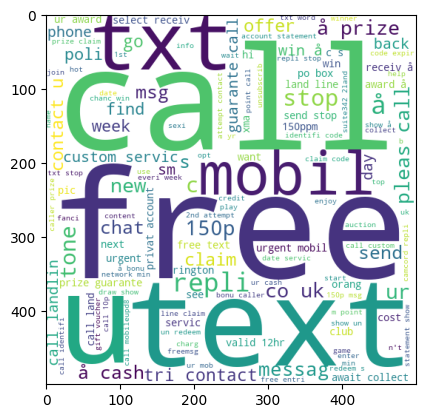

In [50]:
plt.imshow(spam_wc)

2. `Ham` wordcloud

In [51]:
ham_wc = wc.generate(df[df['Output'] == 0]['Transformed-Text'].str.cat(sep = " "))

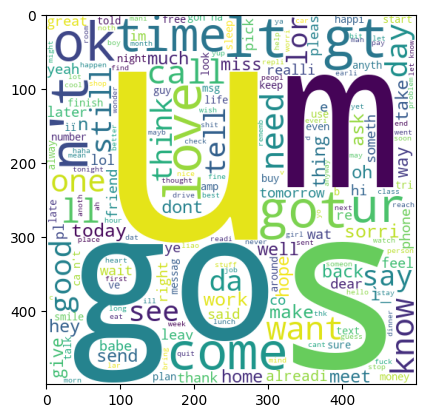

In [52]:
plt.imshow(ham_wc)

- Top words from `Ham` and `Spam`

In [53]:
spam_corpus = []
for sentence in df[df['Output'] == 1]['Transformed-Text'].tolist():
    for word in sentence.split():
        spam_corpus.append(word)

In [54]:
len(spam_corpus)

11083

In [55]:
from collections import Counter
Counter(spam_corpus)

Counter({'call': 320,
         'free': 191,
         '2': 155,
         'txt': 141,
         'text': 122,
         'u': 119,
         'ur': 119,
         'mobil': 114,
         'stop': 104,
         'repli': 103,
         'claim': 98,
         '4': 97,
         'prize': 82,
         'get': 74,
         'new': 64,
         'servic': 64,
         'tone': 63,
         'send': 60,
         "'s": 59,
         'urgent': 57,
         'nokia': 57,
         'contact': 56,
         'award': 55,
         'phone': 52,
         'cash': 51,
         'pleas': 51,
         'week': 49,
         'win': 48,
         'c': 45,
         'collect': 45,
         'min': 45,
         'custom': 42,
         'messag': 42,
         'guarante': 42,
         'per': 41,
         'chat': 38,
         'tri': 37,
         'msg': 35,
         'draw': 35,
         'number': 35,
         'cs': 35,
         'show': 33,
         'today': 33,
         'offer': 33,
         'line': 33,
         'go': 32,
         'receiv': 31,

- Top 30 Words in Spam Corpus

In [56]:
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ("'s", 59),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45)]

In [57]:
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [58]:
x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0]
y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1]

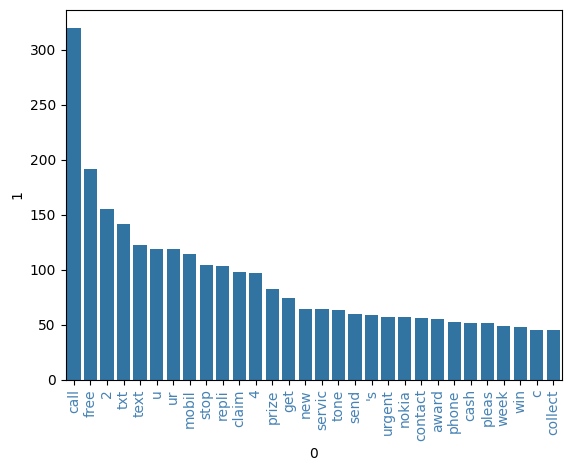

In [59]:
sns.barplot(x = x, y = y)
plt.xticks(rotation='vertical', color = 'steelblue')
plt.show()

- Top `30` words in `Ham`

In [60]:
ham_corpus = []
for sentence in df[df['Output'] == 0]['Transformed-Text'].tolist():
    for word in sentence.split():
        ham_corpus.append(word)

In [61]:
len(ham_corpus)

39894

In [62]:
x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0]
y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1]

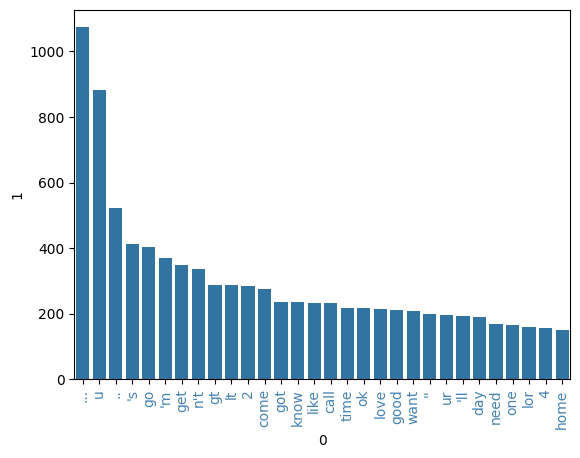

In [63]:
sns.barplot(x = x, y = y)
plt.xticks(rotation='vertical', color = 'steelblue')
plt.show()

In [64]:
df.reset_index()

,index,Input-Text,char_nums,word_nums,sent_nums,Output,Transformed-Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,0,go jurong point crazi .. avail bugi n great wo...
1,1,Ok lar... Joking wif u oni...,29,8,2,0,ok lar ... joke wif u oni ...
2,2,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,1,free entri 2 wkli comp win fa cup final tkt 21...
3,3,U dun say so early hor... U c already then say...,49,13,1,0,u dun say earli hor ... u c alreadi say ...
4,4,"Nah I don't think he goes to usf, he lives aro...",61,15,1,0,nah n't think goe usf live around though
...,...,...,...,...,...,...,...
5164,5567,This is the 2nd time we have tried 2 contact u...,161,35,4,1,2nd time tri 2 contact u. u å£750 pound prize ...
5165,5568,Will Ì_ b going to esplanade fr home?,37,9,1,0,ì_ b go esplanad fr home
5166,5569,"Pity, * was in mood for that. So...any other s...",57,15,2,0,piti mood ... suggest
5167,5570,The guy did some bitching but I acted like i'd...,125,27,1,0,guy bitch act like 'd interest buy someth els ...


In [65]:
df = df.reindex(columns = ['Input-Text', 'char_nums', 'word_nums', 'sent_nums', 'Transformed-Text', 'Output'])
df

,Input-Text,char_nums,word_nums,sent_nums,Transformed-Text,Output
0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi .. avail bugi n great wo...,0
1,Ok lar... Joking wif u oni...,29,8,2,ok lar ... joke wif u oni ...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...,1
3,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor ... u c alreadi say ...,0
4,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah n't think goe usf live around though,0
...,...,...,...,...,...,...
5567,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u. u å£750 pound prize ...,1
5568,Will Ì_ b going to esplanade fr home?,37,9,1,ì_ b go esplanad fr home,0
5569,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood ... suggest,0
5570,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like 'd interest buy someth els ...,0


#### __4.a Model Building__

- Using __Bag Of Words__ _BOW_ to convert `Text` -> `Vectors`
- Using __Naive Bayes__ algorithm to build the model.

In [66]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [67]:
X = cv.fit_transform(df['Transformed-Text']).toarray()

In [68]:
X.shape

(5169, 7377)

In [69]:
y = df['Output'].values

In [70]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [73]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [74]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

- 4.1 __GaussianNB Fit__

In [75]:
gnb.fit(X_train, y_train)
y_pred_1 = gnb.predict(X_test)
print("GaussianNB Accuracy", accuracy_score(y_test, y_pred_1))
print("GaussianNB Precision", precision_score(y_test, y_pred_1))
print("Confusion Matrix\n", confusion_matrix(y_test, y_pred_1))

GaussianNB Accuracy 0.8907156673114119
GaussianNB Precision 0.5555555555555556
Confusion Matrix
 [[796 100]
 [ 13 125]]


- 4.2 __MultinomialNB Fit__

In [76]:
mnb.fit(X_train, y_train)
y_pred_2 = mnb.predict(X_test)
print("MultinomialNB Accuracy", accuracy_score(y_test, y_pred_2))
print("MultinomialNB Precision", precision_score(y_test, y_pred_2))
print("Confusion Matrix\n", confusion_matrix(y_test, y_pred_2))

MultinomialNB Accuracy 0.9738878143133463
MultinomialNB Precision 0.8881118881118881
Confusion Matrix
 [[880  16]
 [ 11 127]]


- 4.3 __BernoulliNB Fit__

In [77]:
bnb.fit(X_train, y_train)
y_pred_3 = bnb.predict(X_test)
print("BernoulliNB Accuracy", accuracy_score(y_test, y_pred_3))
print("BernoulliNB Precision", precision_score(y_test, y_pred_3))
print("Confusion Matrix\n", confusion_matrix(y_test, y_pred_3))

BernoulliNB Accuracy 0.97678916827853
BernoulliNB Precision 0.975
Confusion Matrix
 [[893   3]
 [ 21 117]]


In [79]:
nb_models = [
    "GaussianNB",
    "MultinomialNB",
    "BernoulliNB",
]
accuracy_scores = [
    accuracy_score(y_test, y_pred_1),
    accuracy_score(y_test, y_pred_2),
    accuracy_score(y_test, y_pred_3),
]
precision_scores = [
    precision_score(y_test, y_pred_1),
    precision_score(y_test, y_pred_2),
    precision_score(y_test, y_pred_3),
]

In [81]:
# plotting the accuracy and precision results.

nb_result = {
    "Model" : nb_models,
    "Accuracy" : accuracy_scores,
    "Precision" : precision_scores,
}

# creating the df with sorted in max precision at top, as precision matters the most here in this scenerio.

nb_result_df = pd.DataFrame(nb_result).sort_values('Precision', ascending=False)
nb_result_df

,Model,Accuracy,Precision
2,BernoulliNB,0.976789,0.975000
1,MultinomialNB,0.973888,0.888112
0,GaussianNB,0.890716,0.555556


# Inference
- Using __BOW__ _(Bag Of Words)_
- Best Overall Performance : __BernoulliNB__
- Accuracy &#8594; `97.67%`
- Precision &#8594; `97.5%`

#### __4.b Model Building__

- Using __Term Frequency Inverse Document Frequency__ _TF-IDF_ to convert `Text` -> `Vectors`
- Using __Naive Bayes__ algorithm to build the model.

In [171]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [172]:
X = tfidf.fit_transform(df['Transformed-Text']).toarray()

In [173]:
X.shape

(5169, 7377)

In [174]:
y = df['Output'].values

In [175]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [176]:
gnb.fit(X_train, y_train)
y_pred_1 = gnb.predict(X_test)
print("GaussianNB Accuracy", accuracy_score(y_test, y_pred_1))
print("GaussianNB Precision", precision_score(y_test, y_pred_1))
print("Confusion Matrix\n", confusion_matrix(y_test, y_pred_1))

GaussianNB Accuracy 0.8849129593810445
GaussianNB Precision 0.54337899543379
Confusion Matrix
 [[796 100]
 [ 19 119]]


In [177]:
mnb.fit(X_train, y_train)
y_pred_2 = mnb.predict(X_test)
print("MultinomialNB Accuracy", accuracy_score(y_test, y_pred_2))
print("MultinomialNB Precision", precision_score(y_test, y_pred_2))
print("Confusion Matrix\n", confusion_matrix(y_test, y_pred_2))

MultinomialNB Accuracy 0.9622823984526112
MultinomialNB Precision 1.0
Confusion Matrix
 [[896   0]
 [ 39  99]]


In [178]:
bnb.fit(X_train, y_train)
y_pred_3 = bnb.predict(X_test)
print("BernoulliNB Accuracy", accuracy_score(y_test, y_pred_3))
print("BernoulliNB Precision", precision_score(y_test, y_pred_3))
print("Confusion Matrix\n", confusion_matrix(y_test, y_pred_3))

BernoulliNB Accuracy 0.97678916827853
BernoulliNB Precision 0.975
Confusion Matrix
 [[893   3]
 [ 21 117]]


In [179]:
accuracy_scores = [
    accuracy_score(y_test, y_pred_1),
    accuracy_score(y_test, y_pred_2),
    accuracy_score(y_test, y_pred_3),
]
precision_scores = [
    precision_score(y_test, y_pred_1),
    precision_score(y_test, y_pred_2),
    precision_score(y_test, y_pred_3),
]

In [180]:
# plotting the accuracy and precision results.

nb_result = {
    "Model" : nb_models,
    "Accuracy" : accuracy_scores,
    "Precision" : precision_scores,
}

# creating the df with sorted in max precision at top, as precision matters the most here in this scenerio.

nb_result_df = pd.DataFrame(nb_result).sort_values('Precision', ascending=False)
nb_result_df

,Model,Accuracy,Precision
1,MultinomialNB,0.962282,1.000000
2,BernoulliNB,0.976789,0.975000
0,GaussianNB,0.884913,0.543379


# Inference
- Using __TF-IDF__ _(Term Frequency Inverse Term Frequency)_
- Best Overall Performance : __MultinomialNB__
- Accuracy &#8594; `96.22%`
- Precision &#8594; `100%`

# Experimenting the Precision and Accuracy with Other Models.
## Models Used
1. LogisticRegression
2. SupportVectorClassifier
3. MultinomialNB
4. DecisionTreeClassifier
5. KNeighborsClassifier
6. RandomForestClassifier
7. AdaBoostClassifier
8. BaggingClassifier
9. ExtraTreesClassifier
10. GradientBoostingClassifier
11. XGBClassifier

In [181]:
# importing the models here.

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [182]:
# init the models object here.

svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [183]:
models = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [184]:
# creating a helper func to return accuracy and precision for respective Models.

def train_model(models,X_train,y_train,X_test,y_test):
    models.fit(X_train,y_train)
    y_pred = models.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [185]:
# training all the models here.

train_model(svc,X_train,y_train,X_test,y_test)

(0.971953578336557, 0.9739130434782609)

In [186]:
# finding accuracy and precision for all the models here.

accuracy_scores = []
precision_scores = []

for name,model in models.items():
    
    current_accuracy,current_precision = train_model(model, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.971953578336557
Precision -  0.9739130434782609
For  KN
Accuracy -  0.8965183752417795
Precision -  1.0
For  NB
Accuracy -  0.9622823984526112
Precision -  1.0
For  DT
Accuracy -  0.9352030947775629
Precision -  0.8514851485148515
For  LR
Accuracy -  0.9535783365570599
Precision -  0.95
For  RF
Accuracy -  0.9729206963249516
Precision -  0.9824561403508771
For  AdaBoost
Accuracy -  0.9709864603481625
Precision -  0.9655172413793104
For  BgC
Accuracy -  0.9622823984526112
Precision -  0.8721804511278195
For  ETC
Accuracy -  0.9796905222437138
Precision -  0.9834710743801653
For  GBDT
Accuracy -  0.9506769825918762
Precision -  0.9578947368421052
For  xgb
Accuracy -  0.9758220502901354
Precision -  0.9448818897637795


In [187]:
performance_df = pd.DataFrame({'Algorithm':models.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [188]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.896518,1.000000
2,NB,0.962282,1.000000
8,ETC,0.979691,0.983471
5,RF,0.972921,0.982456
0,SVC,0.971954,0.973913
6,AdaBoost,0.970986,0.965517
9,GBDT,0.950677,0.957895
4,LR,0.953578,0.950000
10,xgb,0.975822,0.944882
7,BgC,0.962282,0.872180


- Separating out Algorithms with Accuracy and Precision Scores individually.

In [189]:
performance_df_melted = pd.melt(performance_df, id_vars = "Algorithm")

In [190]:
performance_df_melted

,Algorithm,variable,value
0,KN,Accuracy,0.896518
1,NB,Accuracy,0.962282
2,ETC,Accuracy,0.979691
3,RF,Accuracy,0.972921
4,SVC,Accuracy,0.971954
5,AdaBoost,Accuracy,0.970986
6,GBDT,Accuracy,0.950677
7,LR,Accuracy,0.953578
8,xgb,Accuracy,0.975822
9,BgC,Accuracy,0.962282


- Plotting Bar Graph for Accuracy and Precision for each Algorithm

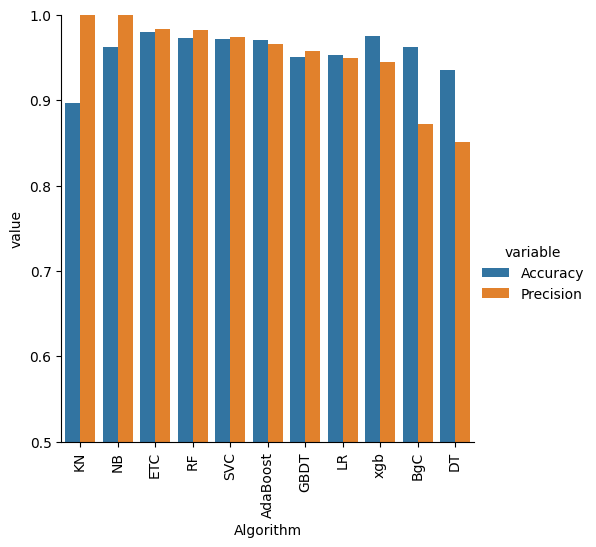

In [191]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df_melted, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

# Inference
#### _Without Fine Tuning the Model_
- Again Still the Best Overall Performance : __MultinomialNB__
- Accuracy &#8594; `96.22%`
- Precision &#8594; `100%`

# Fine Tuning the Model here.

In [192]:
# changing the max features hyperparameter in the tfidf.

tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['Transformed-Text']).toarray()
y = df['Output'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [193]:
# training the models here with hyperparamerer tuning.

train_model(svc,X_train,y_train,X_test,y_test)

(0.9777562862669246, 0.9752066115702479)

In [194]:
# finding accuracy and precision for all the models here.

accuracy_scores_tuned = []
precision_scores_tuned = []

for name,model in models.items():
    
    current_accuracy,current_precision = train_model(model, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores_tuned.append(current_accuracy)
    precision_scores_tuned.append(current_precision)

For  SVC
Accuracy -  0.9777562862669246
Precision -  0.9752066115702479
For  KN
Accuracy -  0.9042553191489362
Precision -  1.0
For  NB
Accuracy -  0.9748549323017408
Precision -  1.0
For  DT
Accuracy -  0.9294003868471954
Precision -  0.8282828282828283
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9523809523809523
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.9729206963249516
Precision -  0.9583333333333334
For  BgC
Accuracy -  0.9564796905222437
Precision -  0.8444444444444444
For  ETC
Accuracy -  0.9806576402321083
Precision -  0.9758064516129032
For  GBDT
Accuracy -  0.9497098646034816
Precision -  0.9387755102040817
For  xgb
Accuracy -  0.9758220502901354
Precision -  0.9669421487603306


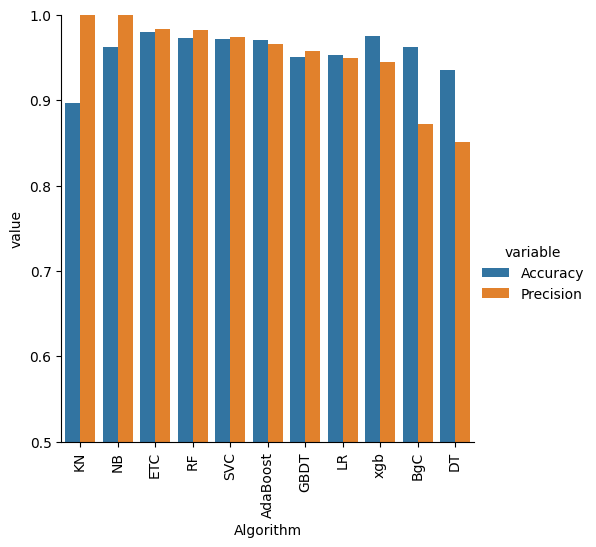

In [195]:
# plotting the bar graph after fine tuning.

sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df_melted, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [196]:
temp_df = pd.DataFrame({'Algorithm':models.keys(),'Accuracy_tuned':accuracy_scores_tuned,'Precision_tuned':precision_scores_tuned}).sort_values('Precision_tuned',ascending=False)
temp_df

,Algorithm,Accuracy_tuned,Precision_tuned
1,KN,0.904255,1.000000
2,NB,0.974855,1.000000
5,RF,0.975822,0.982906
8,ETC,0.980658,0.975806
0,SVC,0.977756,0.975207
10,xgb,0.975822,0.966942
6,AdaBoost,0.972921,0.958333
4,LR,0.958414,0.952381
9,GBDT,0.949710,0.938776
7,BgC,0.956480,0.844444


In [208]:
# merging both the dataframes here.

performance_df_new = performance_df.merge(temp_df,on='Algorithm')
performance_df_new

,Algorithm,Accuracy,Precision,Accuracy_tuned,Precision_tuned
0,KN,0.896518,1.000000,0.904255,1.000000
1,NB,0.962282,1.000000,0.974855,1.000000
2,ETC,0.979691,0.983471,0.980658,0.975806
3,RF,0.972921,0.982456,0.975822,0.982906
4,SVC,0.971954,0.973913,0.977756,0.975207
5,AdaBoost,0.970986,0.965517,0.972921,0.958333
6,GBDT,0.950677,0.957895,0.949710,0.938776
7,LR,0.953578,0.950000,0.958414,0.952381
8,xgb,0.975822,0.944882,0.975822,0.966942
9,BgC,0.962282,0.872180,0.956480,0.844444


In [209]:
data = {
    'Algorithm': models.keys(),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Accuracy_tuned': accuracy_scores_tuned,
    'Precision_tuned': precision_scores_tuned,
}

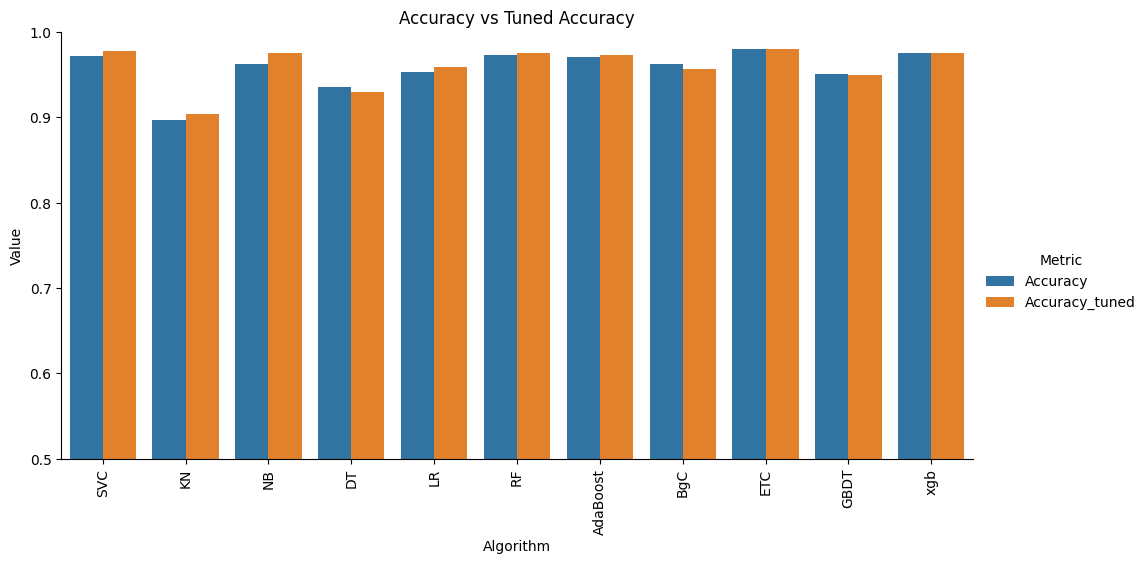

In [210]:
accuracy_df_new = pd.DataFrame(data)

# Melt the DataFrame to a long format
melted_df = pd.melt(accuracy_df_new, id_vars=['Algorithm'], 
                    value_vars=['Accuracy', 'Accuracy_tuned'], 
                    var_name='Metric', value_name='Value')

# Plotting
sns.catplot(x='Algorithm', y='Value', hue='Metric', data=melted_df, kind='bar', height=5, aspect=2)
plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.title('Accuracy vs Tuned Accuracy')
plt.show()

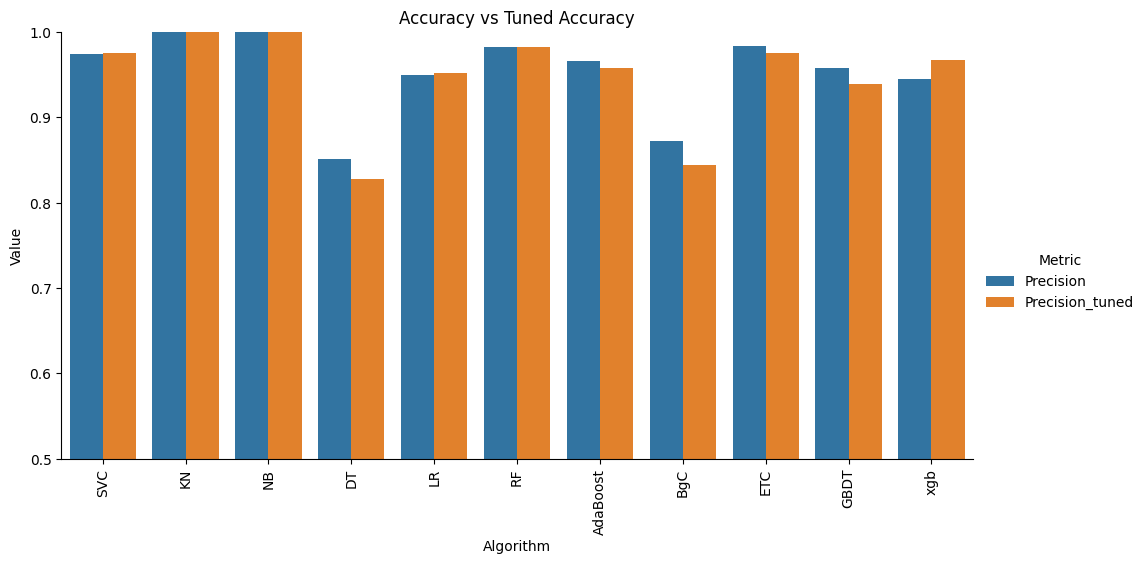

In [211]:
precision_df_new = pd.DataFrame(data)

# Melt the DataFrame to a long format
melted_df = pd.melt(precision_df_new, id_vars=['Algorithm'], 
                    value_vars=['Precision', 'Precision_tuned'], 
                    var_name='Metric', value_name='Value')

# Plotting
sns.catplot(x='Algorithm', y='Value', hue='Metric', data=melted_df, kind='bar', height=5, aspect=2)
plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.title('Accuracy vs Tuned Accuracy')
plt.show()

- Finding the best accuracy and precision out of the best models using Voting Classifier.

- Voting Classifier

In [212]:
# Voting Classifier

svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [213]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [214]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [215]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9845261121856866
Precision 0.9919354838709677


- Using Stacking Classifier with the best models.

In [216]:
from sklearn.ensemble import StackingClassifier

In [217]:
# Applying stacking

estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [218]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [219]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9854932301740812
Precision 0.9694656488549618


# Experiments
- Tried 20+ Algorithms.
- Performed voting classfier.
- Performed stacking.
- Perfomed Hyperparameter tuning.

# Inference
- Still the Best Overall Performance : __MultinomialNB__
- Accuracy &#8594; `96.22%`
- Precision &#8594; `100%`

- Saving the Model and the Vectorizer here.

In [220]:
import pickle
pickle.dump(tfidf, open("Vectorizer.pkl", 'wb'))
pickle.dump(mnb, open("Model.pkl", 'wb'))